Import needed libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
import pandas as pd

In [ ]:
#pn.config.use_multiprocs() # uncomment to use multiprocessing

Read observation in the obs object

In [148]:
obs = pn.Observation(obsFile='./observations1.dat', fileFormat='lines_in_rows', err_default=0.01)

In [149]:
obs.printIntens(returnObs=True)

S4_10.5m      7.000
Ne2_12.8m     8.300
Ne3_15.6m    34.100
S3_18.7m     10.000
O2_3726A     39.700
O2_3729A     18.600
Ne3_3869A    18.900
S2_4069A      0.850
S2_4076A      0.450
O3_4363A      4.360
He2r_4686A    0.000
H1r_4861A   100.000
O3_5007A    435.090
N2_5755A      0.510
He1r_5876A   15.345
S3_6312A      0.760
O1_6300A      1.690
O1_6364A      0.540
H1r_6563A   345.000
N2_6584A     19.000
S2_6716A      1.220
S2_6731A      2.180
Ar3_7136A     4.910
O2_7319A+     6.540
O2_7330A+     5.170


In [150]:
for line in obs.lines:
    if line.obsIntens[0] > 10:
        line.obsError *= 5
    elif line.obsIntens[0] > 1:
        line.obsError *= 10
    else:
        line.obsError *= 20
    if line.label[-1] == 'm':
        line.obsError *= 1.5
    print(line.label, line.obsError, line.obsIntens)


S4_10.5m [0.15] [7.]
Ne2_12.8m [0.15] [8.30000019]
Ne3_15.6m [0.075] [34.09999847]
S3_18.7m [0.15] [10.]
O2_3726A [0.05] [39.70000076]
O2_3729A [0.05] [18.60000038]
Ne3_3869A [0.05] [18.89999962]
S2_4069A [0.2] [0.85000002]
S2_4076A [0.2] [0.44999999]
O3_4363A [0.1] [4.36000013]
He2r_4686A [0.2] [0.]
H1r_4861A [0.05] [100.]
O3_5007A [0.05] [435.08999634]
N2_5755A [0.2] [0.50999999]
He1r_5876A [0.05] [15.34500027]
S3_6312A [0.2] [0.75999999]
O1_6300A [0.1] [1.69000006]
O1_6364A [0.2] [0.54000002]
H1r_6563A [0.05] [345.]
N2_6584A [0.05] [19.]
S2_6716A [0.1] [1.22000003]
S2_6731A [0.1] [2.18000007]
Ar3_7136A [0.1] [4.90999985]
O2_7319A+ [0.1] [6.53999996]
O2_7330A+ [0.1] [5.17000008]


Add 100 synthetic observations, based on the observed intensities and the errors on them (here default value is 5%)

In [151]:
obs.addMonteCarloObs(N=10000)

Reset Hbeta to 100, it hase no error by definition

In [152]:
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100

Correct observations from reddening

In [153]:
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=2.85)

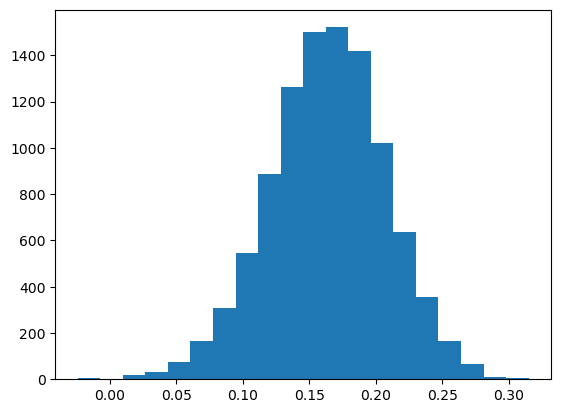

In [154]:
f, ax = plt.subplots()
ax.hist(obs.extinction.E_BV, bins=20);

In [155]:
obs.correctData(normWave=4861.)

Have a look at the line intensities: 101 values for each one (the first value is the original one).

In [156]:
obs.printIntens()

S4_10.5m      4.076    3.659    2.625    3.777    4.827    3.449    5.969    5.202    3.080    4.537    2.911    3.619    3.248    4.746    4.555    2.757    5.031    3.421    2.233    3.276    4.759    4.075    4.806    3.977    4.066    3.387    4.755    5.188    4.468    4.414    4.619    5.197    3.849    6.533    5.668    4.590    3.641    5.069    4.248    3.376    3.929    3.534    4.280    3.614    3.658    4.855    3.499    5.797    4.049    7.318    4.062    3.968    3.748    2.978    2.411    4.044    2.983    4.444    3.550    3.272    3.245    5.459    3.889    4.310    3.779    4.914    4.183    4.738    5.271    3.284    4.113    3.390    5.659    3.418    5.229    2.746    4.325    4.646    4.702    3.743    4.346    3.130    4.174    2.842    2.777    3.936    3.001    3.808    3.043    3.122    7.301    3.465    4.619    3.503    3.307    3.757    3.396    2.228    3.313    4.027    6.243    3.475    3.621    3.853    4.138    3.474    3.997    3.060    2.799    5.214

In [157]:
l = pd.DataFrame(obs.getIntens())
print(l.std() / l.mean() * 100)

S4_10.5m      2.103915e+01
Ne2_12.8m     2.121118e+01
Ne3_15.6m     1.662351e+01
S3_18.7m      2.135047e+01
O2_3726A      6.658914e+00
O2_3729A      6.581603e+00
Ne3_3869A     6.247631e+00
S2_4069A      2.017079e+01
S2_4076A      2.016480e+01
O3_4363A      1.022864e+01
He2r_4686A             NaN
H1r_4861A     0.000000e+00
O3_5007A      5.063617e+00
N2_5755A      2.022819e+01
He1r_5876A    6.038281e+00
S3_6312A      2.078303e+01
O1_6300A      1.113555e+01
O1_6364A      2.051120e+01
H1r_6563A     1.269766e-14
N2_6584A      7.201065e+00
S2_6716A      1.135484e+01
S2_6731A      1.141060e+01
Ar3_7136A     1.191172e+01
O2_7319A+     1.189178e+01
O2_7330A+     1.205436e+01
dtype: float64


Plot the histogram of [OIII]/H$\beta$

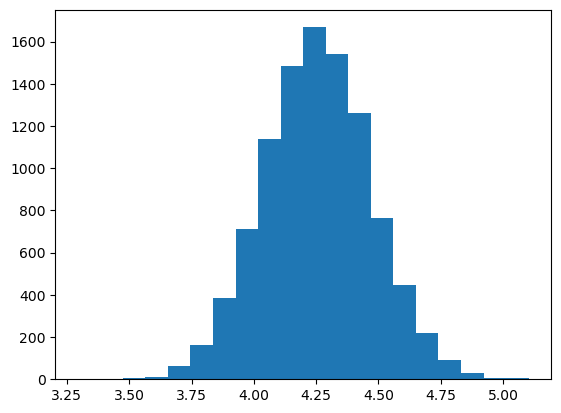

In [158]:
f, ax = plt.subplots()
ax.hist(obs.getIntens()['O3_5007A']/obs.getIntens()['H1r_4861A'], bins=20);

Instantiate the diag object to compute the diagnostics

In [159]:
diag = pn.Diagnostics()

Consider all the diagnostics available given the observed lines

In [160]:
diag.addDiagsFromObs(obs)

Have a look at the diagnostics

In [161]:
diag.diags

{'[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[OII] 3726/3729': ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])'),
 '[OII] 3727+/7325+': ('O2',
  '(L(3726)+L(3729))/(B("7319A+")+B("7330A+"))',
  'RMS([E(3726)*L(3726)/(L(3726)+L(3729)), E(3729)*L(3729)/(L(3726)+L(3729)),BE("7319A+")*B("7319A+")/(B("7319A+")+B("7330A+")),BE("7330A+")*B("7330A+")/(B("7319A+")+B("7330A+"))])'),
 '[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SII] 4069/4076': ('S2', 'L(4069)/L(4076)', 'RMS([E(4069), E(4076)])'),
 '[SII] 4072+/6720+': ('S2',
  '(L(4069)+L(4076))/(L(6716)+L(6731))',
  'RMS([E(6716)*L(6716)/(L(6716)+L(6731)), E(6731)*L(6731)/(L(6716)+L(6731)), E(4069)*L(4069)/(L(4069)+L(4076)), E(4076)*L(4076)/(L(4069)+L(4076))])'),
 '[SIII] 6312/18.7m': ('S3', 'L(6312)/L(187000)', 'RMS([E(187000), E(6312)])'),
 '[NeIII] 3869/15.6m': ('Ne3',
  'L(3869)/L(156000)',
  'RMS([E(1

Get a list of all the atoms string involved in the observations

In [162]:
all_atoms = obs.getUniqueAtoms()

In [163]:
all_atoms

array(['Ar3', 'H1r', 'He1r', 'He2r', 'N2', 'Ne2', 'Ne3', 'O1', 'O2', 'O3',
       'S2', 'S3', 'S4'], dtype='<U4')

Creat a dictionnary of all the emisGrids that are doable from the atoms previously defined.

In [164]:
emisDict = pn.getEmisGridDict(atom_list=all_atoms)

warng getEmisGridDict: Emission map not found: ./pypics//emis_H1r.pypic
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng getEmisGridDict: No H1r EmisGrid
warng getEmisGridDict: Emission map not found: ./pypics//emis_He1r.pypic
warng _ManageAtomicData: atom data not available for He1
warng _ManageAtomicData: coll data not available for He1
warng getEmisGridDict: No He1r EmisGrid
warng getEmisGridDict: Emission map not found: ./pypics//emis_He2r.pypic
warng _ManageAtomicData: atom data not available for He2
warng _ManageAtomicData: coll data not available for He2
warng getEmisGridDict: No He2r EmisGrid


In [165]:
emisDict

{'Ar3': <pyneb.core.emisGrid.EmisGrid at 0x7fd95bfe8fd0>,
 'N2': <pyneb.core.emisGrid.EmisGrid at 0x7fd96005cfd0>,
 'Ne2': <pyneb.core.emisGrid.EmisGrid at 0x7fd9535b13d0>,
 'Ne3': <pyneb.core.emisGrid.EmisGrid at 0x7fd9723ef340>,
 'O1': <pyneb.core.emisGrid.EmisGrid at 0x7fd95bfe83a0>,
 'O2': <pyneb.core.emisGrid.EmisGrid at 0x7fd922a550a0>,
 'O3': <pyneb.core.emisGrid.EmisGrid at 0x7fd95bfe8e50>,
 'S2': <pyneb.core.emisGrid.EmisGrid at 0x7fd95bfbcc10>,
 'S3': <pyneb.core.emisGrid.EmisGrid at 0x7fd95bfbcbe0>,
 'S4': <pyneb.core.emisGrid.EmisGrid at 0x7fd922b16af0>}

Plot the diagnostic diagram from the previously defined dictionnary. Only the 1rst value of the observations, the original one.

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:636: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X, Y, diag_map, levels=[diag_value], colors=col, linestyles=style)


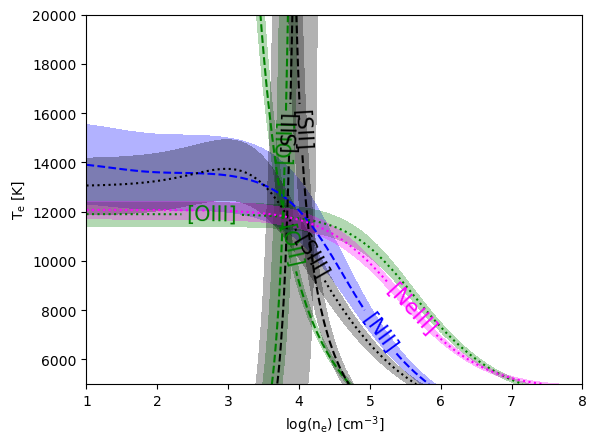

In [166]:
diag.plot(emis_grids=emisDict, obs=obs, i_obs=0)

Compute Te and Ne from the crossing points of every synthetic observations.

In [167]:
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs)

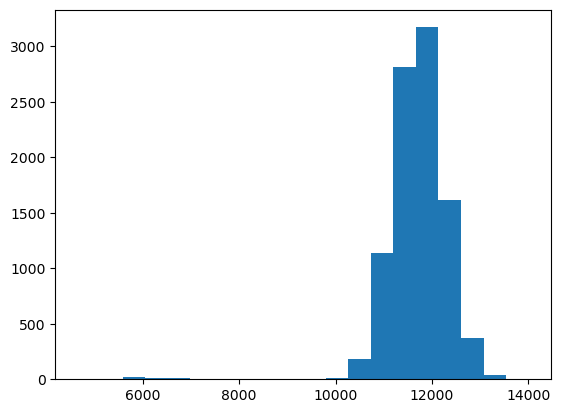

In [168]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=20);

In [169]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.1f} +/- {np.nanstd(np.log10(N_S2)):.1f}  cm-3')

Te = 11733.8 K +/- 673.8
log Ne = 3.8 +/- 0.3  cm-3


The following needs to have keras, scikit and ai4neb installed. It used machine learning to accelerate the computation of electron temperature and density. 

In [109]:
pn.config.import_AI4Neb()

2025-04-08 17:11:28.929315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christophemorisset/anaconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [110]:
diag.getCrossTemDen?

Signature:
diag.getCrossTemDen(
    diag_tem,
    diag_den,
    value_tem=None,
    value_den=None,
    obs=None,
    i_obs=None,
    guess_tem=10000,
    tol_tem=1.0,
    tol_den=1.0,
    max_iter=5,
    maxError=0.001,
    start_tem=-1,
    end_tem=-1,
    start_den=-1,
    end_den=-1,
    use_ANN=False,
    limit_res=False,
    ANN=None,
)
Docstring:
Cross-converge the temperature and density derived from two sensitive line ratios, by inputting the quantity 
derived with one line ratio into the other and then iterating.
The temperature- and density-sensitive ratios can be input directly or as an Observation object

Parameters:

    diag_tem:   temperature-sensitive diagnostic line ratio
    diag_den:   density-sensitive diagnostic line ratio
    value_tem:  value of the temperature-sensitive diagnostic
    value_den:  value of the density-sensitive diagnostic
    obs:        np.Observation object. Values for observed temperature and density diagnostics are
                    taken 

In [114]:
N_MonteCarlo = 10000 # do not try this without use_ANN = True, this will take too much time
obs = pn.Observation(obsFile='./observations1.dat', fileFormat='lines_in_rows', err_default=0.01)
for line in obs.lines:
    if line.obsIntens[0] > 10:
        line.obsError *= 5
    elif line.obsIntens[0] > 1:
        line.obsError *= 10
    else:
        line.obsError *= 20
    if line.label[-1] == 'm':
        line.obsError *= 1.5
obs.addMonteCarloObs(N=N_MonteCarlo)
l = obs.getLine(label='H1r_4861A')
l.obsIntens = np.ones_like(l.obsIntens) * 100
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=2.85)
obs.correctData(normWave=4861.)
diag = pn.Diagnostics()
diag.addDiagsFromObs(obs)

# Set the hyper parameters for the ANN. Default values should be OK
diag.ANN_init_kwargs = {'solver': 'lbfgs', 'activation': 'tanh', 'hidden_layer_sizes': (10, 30, 10), 'max_iter': 20000}
diag.ANN_inst_kwargs = {'RM_type': 'SK_ANN', 'verbose': False, 'scaling': True, 'use_log': True, 'random_seed': None}

# Set the ranges in Te and Ne for the training 
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs, use_ANN=True,
                                 start_tem=6000, end_tem=20000, start_den=1e2, end_den=1e6, limit_res=True)

In [115]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')

Te = 11713.2 K +/- 1063.4
log Ne = 3.84 +/- 0.54  cm-3


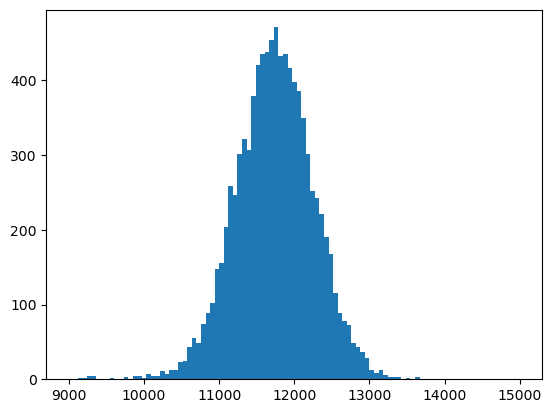

In [116]:
f, ax = plt.subplots()
ax.hist(T_O3, bins=np.linspace(9000, 15000, 100));

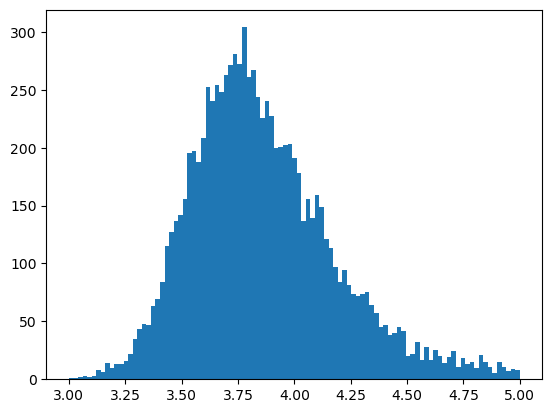

In [117]:
f, ax = plt.subplots()
ax.hist(np.log10(N_S2), bins=np.linspace(3, 5, 100));

Redo the computation of reddening correction using coherent H$\alpha$/H$\beta$, taking into account previously determined Te and Ne

Save the previously computed neural network

In [30]:
diag.ANN.save_RM('O3S2')

In [31]:
H1r = pn.RecAtom('H', 1)
r_theo = H1r.getEmissivity(T_O3, N_S2, wave=6563, product=False) / H1r.getEmissivity(T_O3, N_S2, wave=4861, product=False)
obs.def_EBV(label1='H1r_6563A', label2='H1r_4861A', r_theo=r_theo)
obs.correctData(normWave=4861.)
diag = pn.Diagnostics()
diag.addDiagsFromObs(obs)
# Read the previously computed neural network
ANN = ai4neb.manage_RM(RM_filename='O3S2')
# Now the run should be very fast as no training is done, only predictions
T_O3, N_S2 = diag.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs, use_ANN=True, ANN=ANN, limit_res=True)

In [32]:
print(f'Te = {np.nanmedian(T_O3):.1f} K +/- {np.nanstd(T_O3):.1f}')
print(f'log Ne = {np.nanmedian(np.log10(N_S2)):.2f} +/- {np.nanstd(np.log10(N_S2)):.2f}  cm-3')

Te = 11760.9 K +/- 1212.4
log Ne = 3.79 +/- 0.35  cm-3


In [118]:
#Create a dictionnary that olds all the atom objects
atomDict = pn.getAtomDict(atom_list=all_atoms)
ion_ab_dic = {}
for line in obs.getSortedLines():
    atom = atomDict[line.atom]
    ion_ab_dic[line.label] = atom.getIonAbundance(line.corrIntens, T_O3, N_S2, to_eval=line.to_eval)

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: atom data not available for He1
warng _ManageAtomicData: coll data not available for He1
warng _ManageAtomicData: atom data not available for He2
warng _ManageAtomicData: coll data not available for He2
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4


In [119]:
ion_ab_dic

{'Ar3_7136A': array([2.21655019e-07, 2.63901734e-07, 3.00175101e-07, ...,
        2.13319034e-07, 2.15641681e-07, 1.92245863e-07]),
 'H1r_4861A': array([1., 1., 1., ..., 1., 1., 1.]),
 'H1r_6563A': array([1.01077997, 1.00443269, 1.00796523, ..., 1.01029567, 1.01144201,
        1.00993221]),
 'He1r_5876A': array([0.08166735, 0.08333173, 0.0800208 , ..., 0.08179384, 0.07789855,
        0.08539904]),
 'He2r_4686A': array([0., 0., 0., ..., 0., 0., 0.]),
 'N2_5755A': array([2.55505280e-06, 4.31478026e-06, 2.67364582e-06, ...,
        2.11806673e-06, 1.83116154e-06, 2.29344205e-06]),
 'N2_6584A': array([2.27130575e-06, 2.78486614e-06, 2.93815970e-06, ...,
        2.06798188e-06, 3.01033729e-06, 2.46352194e-06]),
 'Ne2_12.8m': array([5.87883560e-06, 8.80141851e-06, 8.07400150e-06, ...,
        5.06704945e-06, 6.30094542e-06, 6.68961766e-06]),
 'Ne3_15.6m': array([1.25626374e-05, 1.77159690e-05, 1.55882656e-05, ...,
        1.04781364e-05, 1.54446634e-05, 1.30761728e-05]),
 'Ne3_3869A': array(

Define O/H = O$^+$/H$^+$ + O$^{++}$/H$^+$, where O$^+$ is the mean value of the ionic abundances obtained from the two [OII]3726, 29 lines. No ICF is used here.

In [120]:
OH = ion_ab_dic['O3_5007A'] + 0.5*(ion_ab_dic['O2_3726A'] + ion_ab_dic['O2_3729A'])

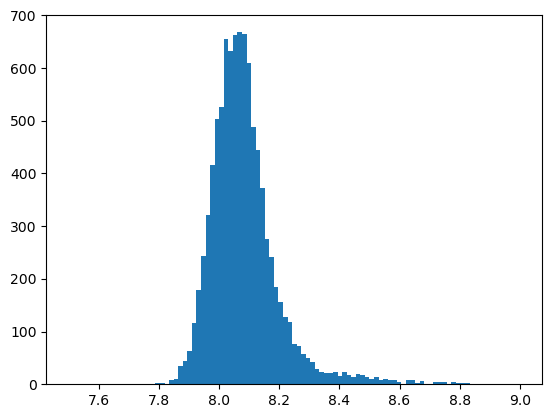

In [121]:
f, ax = plt.subplots()
ax.hist(12 + np.log10(OH), bins = np.linspace(7.5, 9.0, 100));

In [122]:
med = np.nanmedian(np.log10(OH))
std = np.nanstd(np.log10(OH))
q16 = np.nanquantile(np.log10(OH), 0.16)
q84 = np.nanquantile(np.log10(OH), 0.84)

print(f'12 + log(OH) = {12+med:.2f} +/- {std:.2f}')
print(f'12 + log(OH) = {12+med:.2f} + {q84-med:.2f} - {med-q16:.2f}')


12 + log(OH) = 8.07 +/- 0.45
12 + log(OH) = 8.07 + 0.12 - 0.08
